<a href="https://colab.research.google.com/github/alexcarvajal/ModeloPrediccionBRT/blob/main/Selecci%C3%B3nModelos/Algoritmos_Modelo_Inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de los *Datasets*

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
import time
start_time = time.time()
import os, psutil
url1 = '/content/drive/MyDrive/Reuniones/DatasetsWP2/Dataset1CodificadoV2.csv'
data1 = pd.read_csv(url1)
data1 = data1.drop(columns =['Unnamed: 0'])
data1
url2 = '/content/drive/MyDrive/Reuniones/DatasetsWP2/Dataset2CodificadoV2.csv'
data2 = pd.read_csv(url2)
process = psutil.Process()
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")
data1

Memory usage: 423.6328125 megabytes
Tiempo de ejecución: 4.689323902130127 segundos


,Month,Day,Day_Week_Number,Holidays,Hour,Minute,Inputs,Outputs,Station_(02000)Cabecera Autopista Norte,Station_(02300)Calle 100,Station_(03000)Portal Suba,Station_(04000)Cabecera Calle 80,Station_(05000)Portal Américas,Station_(06000)Portal Eldorado,Station_(07000)Portal Sur,Station_(08000)Portal Tunal,Station_(09000)Cabecera Usme,Station_(10000)Portal 20 de Julio
0,8,6,7,0.0,3,45,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,6,7,0.0,3,45,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8,6,7,0.0,3,45,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8,6,7,0.0,3,45,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,6,7,0.0,3,45,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437429,8,27,7,0.0,23,45,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
437430,8,27,7,0.0,23,45,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
437431,8,27,7,0.0,23,45,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
437432,8,27,7,0.0,23,45,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


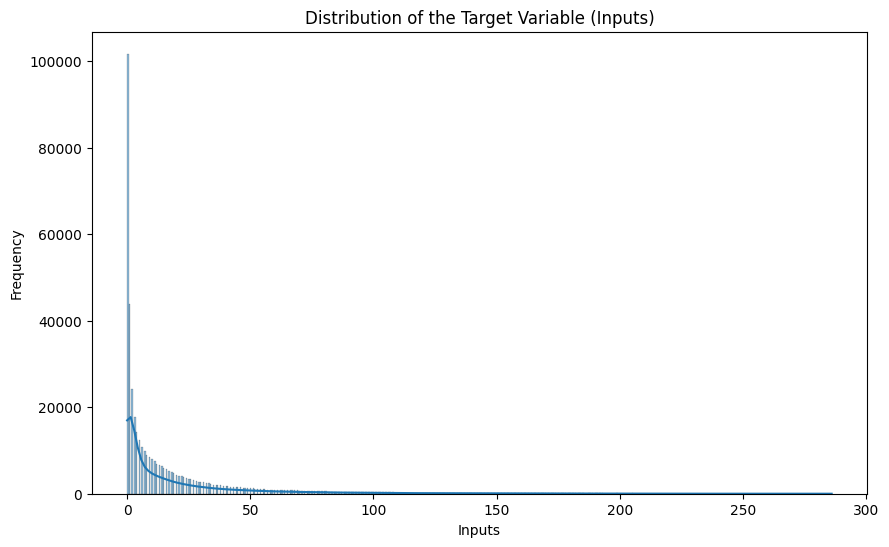

Inputs                                     1.000000
Station_(02300)Calle 100                   0.134285
Station_(06000)Portal Eldorado             0.099567
Station_(04000)Cabecera Calle 80           0.015181
Station_(02000)Cabecera Autopista Norte    0.006262
Station_(05000)Portal Américas             0.005215
Day                                        0.001441
Minute                                    -0.001797
Station_(07000)Portal Sur                 -0.019041
Station_(03000)Portal Suba                -0.024656
Station_(09000)Cabecera Usme              -0.027113
Station_(10000)Portal 20 de Julio         -0.030669
Station_(08000)Portal Tunal               -0.081654
Day_Week_Number                           -0.085017
Holidays                                  -0.110822
Outputs                                   -0.126777
Hour                                      -0.311409
Month                                           NaN
Name: Inputs, dtype: float64

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Análisis de la distribución de la variable objetivo 'Inputs'
plt.figure(figsize=(10, 6))
sns.histplot(data1['Inputs'], kde=True)
plt.title('Distribution of the Target Variable (Inputs)')
plt.xlabel('Inputs')
plt.ylabel('Frequency')
plt.show()
# Calculando las correlaciones entre las características y la variable objetivo
correlation_matrix = data1.corr()
correlations_with_target = correlation_matrix['Inputs'].sort_values(ascending=False)
correlations_with_target

# **Modelo Inicial Dataset 1**


## Random Forest *Dataset 1*
70% Entrenamiento - 30% Prueba

In [3]:
start_time = time.time()
data1
# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']

# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando las dimensiones de los conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Creando una instancia del modelo Random Forest Regressor con valores predeterminados
rf_model = RandomForestRegressor(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process

process = psutil.Process()
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")


RMSE: 22.959166751624796
MSE: 527.1233379289135
R^2: 0.4637912342392305
R^2 ajustado: 0.4637217628528745
MAPE: 7662188449970588.0
MAE: 13.244589545649774
Memory usage: 1827.765625 megabytes
Tiempo de ejecución: 02:40


## Random Forest *Dataset 1*
80% Entrenamiento - 20% Prueba

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

start_time = time.time()
data1
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']

# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando las dimensiones de los conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Creando una instancia del modelo Random Forest Regressor con valores predeterminados
rf_model = RandomForestRegressor(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')

process = psutil.Process()
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")


RMSE: 22.920953694890326
MSE: 525.3701182833064
R^2: 0.4720537928790002
R^2 ajustado: 0.47195118412022785
MAPE: 7738861460099810.0
MAE: 13.232952429997614
Memory usage: 2062.03125 megabytes
Tiempo de ejecución: 02:49



## LSTM *Dataset 1*
80% Entrenamiento - 20% Prueba

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense


start_time = time.time()
data1

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1)
X = scaled_data[:, data1.columns != 'Inputs']
y = scaled_data[:, data1.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

test_data_shape = (y_test.shape[0], scaled_data.shape[1])

test_data_filled = np.zeros(test_data_shape)

input_column_index = list(data1.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
r2_adjusted = 1 - (1 - r2) * (len(y_test_original) - 1) / (len(y_test_original) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test_original, y_pred_original)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process

process = psutil.Process()
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")


Epoch 1/10
5468/5468 [==============================] - 61s 10ms/step - loss: 0.0078
Epoch 2/10
5468/5468 [==============================] - 51s 9ms/step - loss: 0.0057
Epoch 3/10
5468/5468 [==============================] - 49s 9ms/step - loss: 0.0053
Epoch 4/10
5468/5468 [==============================] - 50s 9ms/step - loss: 0.0050
Epoch 5/10
5468/5468 [==============================] - 51s 9ms/step - loss: 0.0048
Epoch 6/10
5468/5468 [==============================] - 52s 9ms/step - loss: 0.0046
Epoch 7/10
5468/5468 [==============================] - 48s 9ms/step - loss: 0.0044
Epoch 8/10
5468/5468 [==============================] - 66s 12ms/step - loss: 0.0043
Epoch 9/10
5468/5468 [==============================] - 48s 9ms/step - loss: 0.0042
Epoch 10/10
2734/2734 [==============================] - 11s 4ms/step
RMSE: 18.215609724087233
MSE: 331.8084376202614
R^2: 0.6637638386184237
R^2 ajustado: 0.6637523082812822
MAPE: 6566254608113499.0
MAE: 10.478352323801099
Memory usage: 2982

## LSTM Dataset 1
70% Entrenamiento - 30% Prueba

In [6]:
data1
start_time = time.time()

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1)
X = scaled_data[:, data1.columns != 'Inputs']
y = scaled_data[:, data1.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

y_pred = model.predict(X_test)
test_data_shape = (y_test.shape[0], scaled_data.shape[1])

# Rellenar el array con ceros (o puedes usar otro valor neutral)
test_data_filled = np.zeros(test_data_shape)

# Colocar los valores de y_test y y_pred en la columna correspondiente a 'Inputs'
# Asegúrate de usar el índice correcto para la columna 'Inputs'
input_column_index = list(data1.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
r2_adjusted = 1 - (1 - r2) * (len(y_test_original) - 1) / (len(y_test_original) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
process = psutil.Process()
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")


Epoch 1/10
4785/4785 [==============================] - 54s 10ms/step - loss: 0.0080
Epoch 2/10
4785/4785 [==============================] - 53s 11ms/step - loss: 0.0058
Epoch 3/10
4785/4785 [==============================] - 44s 9ms/step - loss: 0.0054
Epoch 4/10
4785/4785 [==============================] - 44s 9ms/step - loss: 0.0051
Epoch 5/10
4785/4785 [==============================] - 46s 10ms/step - loss: 0.0049
Epoch 6/10
4785/4785 [==============================] - 44s 9ms/step - loss: 0.0047
Epoch 7/10
4785/4785 [==============================] - 44s 9ms/step - loss: 0.0045
Epoch 8/10
4785/4785 [==============================] - 43s 9ms/step - loss: 0.0044
Epoch 9/10
4785/4785 [==============================] - 43s 9ms/step - loss: 0.0043
Epoch 10/10
4101/4101 [==============================] - 14s 3ms/step
RMSE: 18.50051689079238
MSE: 342.26912522649417
R^2: 0.6535906350198794
R^2 ajustado: 0.6535827156434224
MAPE: 6695283648010419.0
MAE: 10.71683656365045
Memory usage: 3204

## SVM Dataset 1
80% Entrenamiento - 20% prueba

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data1.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs','Outputs'])
y = data1['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## SVM Dataset 1

70% Entrenamiento - 30% Prueba


In [ ]:

#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data1.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs','Outputs'])
y = data1['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KeyError: "['Unnamed: 0'] not found in axis"

## XGBoost Dataset 1
80% Entrenamiento - 20% Entrenamiento


In [7]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
start_time = time.time()


data1
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

RMSE: 19.805127391470528
MSE: 392.24307099237615
R^2: 0.5358519560715818
R^2 ajustado: 0.5357617467774687
MAPE: 7198898618302209.0
MAE: 11.753244610414322
Memory usage: 3122.140625 megabytes
Tiempo de ejecución: 00:05


## XGBoost Dataset 1
70% Entrenamiento - 30% Entrenamiento

In [8]:
start_time = time.time()

data1.head()
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

RMSE: 21.994742217744133
MSE: 483.7686852250161
R^2: 0.5333390888142582
R^2 ajustado: 0.5332786280711141
MAPE: 7252625893673979.0
MAE: 12.79084771306377
Memory usage: 3148.50390625 megabytes
Tiempo de ejecución: 00:04


# **Modelo Inicial Dataset 2**

## Random Forest Dataset 2

70% Entrenamiento - 30% Prueba

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
start_time = time.time()

data2.head()
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')

process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

RMSE: 25.443714723413876
MSE: 647.382618926468
R^2: 0.43822822424293595
R^2 ajustado: 0.438135283952668
MAPE: 3.0161269978591276
MAE: 16.409496114544297
Memory usage: 3171.35546875 megabytes
Tiempo de ejecución: 01:20


## Random Forest Dataset 2

80% Entrenamiento - 20% Prueba

In [10]:
start_time = time.time()

data2.head()

X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

RMSE: 25.245471336062316
MSE: 637.333822979944
R^2: 0.4439323578511053
R^2 ajustado: 0.4437943522627701
MAPE: 3.043169969115295
MAE: 16.3089348788993
Memory usage: 3106.9375 megabytes
Tiempo de ejecución: 01:05


## LSTM Dataset 2
70% Entrenamiento - 30% Prueba

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time
start_time = time.time()

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data2)
X = scaled_data[:, data2.columns != 'Inputs']
y = scaled_data[:, data2.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

# Preparar datos para revertir la normalización
# Crear un array vacío con la forma de los datos originales
test_data_shape = (y_test.shape[0], scaled_data.shape[1])

# Rellenar el array con ceros (o puedes usar otro valor neutral)
test_data_filled = np.zeros(test_data_shape)

# Colocar los valores de y_test y y_pred en la columna correspondiente a 'Inputs'
# Asegúrate de usar el índice correcto para la columna 'Inputs'
input_column_index = list(data2.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
r2_adjusted = 1 - (1 - r2) * (len(y_test_original) - 1) / (len(y_test_original) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

Epoch 1/10
3527/3527 [==============================] - 64s 17ms/step - loss: 0.0120
Epoch 2/10
3527/3527 [==============================] - 48s 14ms/step - loss: 0.0092
Epoch 3/10
3527/3527 [==============================] - 32s 9ms/step - loss: 0.0088
Epoch 4/10
3527/3527 [==============================] - 32s 9ms/step - loss: 0.0086
Epoch 5/10
3527/3527 [==============================] - 32s 9ms/step - loss: 0.0084
Epoch 6/10
3527/3527 [==============================] - 31s 9ms/step - loss: 0.0083
Epoch 7/10
3527/3527 [==============================] - 31s 9ms/step - loss: 0.0083
Epoch 8/10
3527/3527 [==============================] - 32s 9ms/step - loss: 0.0082
Epoch 9/10
3527/3527 [==============================] - 32s 9ms/step - loss: 0.0082
Epoch 10/10
3023/3023 [==============================] - 10s 3ms/step
RMSE: 24.666132187285204
MSE: 608.4180770806272
R^2: 0.47973964795197144
R^2 ajustado: 0.47972351134479274
MAPE: 3.3173049989271215
MAE: 16.24411609781808
Memory usage: 282

## LSTM Dataset 2
80% Entrenamiento - 20% Prueba

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time
start_time = time.time()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data2)
X = scaled_data[:, data2.columns != 'Inputs']
y = scaled_data[:, data2.columns == 'Inputs']

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

y_pred = model.predict(X_test)

test_data_shape = (y_test.shape[0], scaled_data.shape[1])

test_data_filled = np.zeros(test_data_shape)
input_column_index = list(data2.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
r2_adjusted = 1 - (1 - r2) * (len(y_test_original) - 1) / (len(y_test_original) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

Epoch 1/10
4031/4031 [==============================] - 40s 9ms/step - loss: 0.0120
Epoch 2/10
4031/4031 [==============================] - 36s 9ms/step - loss: 0.0092
Epoch 3/10
4031/4031 [==============================] - 38s 9ms/step - loss: 0.0087
Epoch 4/10
4031/4031 [==============================] - 34s 8ms/step - loss: 0.0085
Epoch 5/10
4031/4031 [==============================] - 36s 9ms/step - loss: 0.0084
Epoch 6/10
4031/4031 [==============================] - 37s 9ms/step - loss: 0.0083
Epoch 7/10
4031/4031 [==============================] - 40s 10ms/step - loss: 0.0083
Epoch 8/10
4031/4031 [==============================] - 39s 10ms/step - loss: 0.0082
Epoch 9/10
4031/4031 [==============================] - 36s 9ms/step - loss: 0.0082
Epoch 10/10
2016/2016 [==============================] - 7s 3ms/step
RMSE: 24.582187043797074
MSE: 604.2839198562247
R^2: 0.47753483941017794
R^2 ajustado: 0.4775105315445777
MAPE: 3.409809360335977
MAE: 16.267632391665938
Memory usage: 2980.

## SVM Dataset 2
70% Entrenamiento - 30% Prueba


In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



data2 = data2.drop(columns =['Unnamed: 0'])


# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## SVM Dataset 2
80% Entrenamiento - 20% Prueba


In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



data2 = data2.drop(columns =['Unnamed: 0'])


# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## XGBoost Dataset 2
70% Entrenamiento - 30% Prueba


In [14]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
start_time = time.time()


data2.head()
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

RMSE: 26.298872719506097
MSE: 691.630706316782
R^2: 0.41428622582456665
R^2 ajustado: 0.41418932453736246
MAPE: 2.8453169706733057
MAE: 16.508351520482137
Memory usage: 2846.83984375 megabytes
Tiempo de ejecución: 00:01


## XGBoost Dataset 2
80% Entrenamiento - 20% Prueba


In [13]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

start_time = time.time()

data2
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")
end_time = time.time()
execution_time = end_time - start_time

# Calcular minutos y segundos
minutes = int(execution_time // 60)
seconds = int(execution_time % 60)

# Formatear y mostrar el tiempo de ejecución
print(f"Tiempo de ejecución: {minutes:02d}:{seconds:02d}")

RMSE: 23.240835628498232
MSE: 540.1364407108729
R^2: 0.47054810630102895
R^2 ajustado: 0.47041670624364973
MAPE: 2.8729287536403887
MAE: 15.11531067256965
Memory usage: 2846.83984375 megabytes
Memory usage: 2846.83984375 megabytes
Tiempo de ejecución: 00:02
